In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import folium
from folium.plugins import HeatMap

In [3]:
plt.style.use('ggplot')
sns.set_palette("husl")

In [9]:
df = pd.read_csv('dataset_feature_engineering.csv')
# remove the cc_num column
df = df.drop(columns=['cc_num'])

## Exploratory analysis

In [10]:
print(f"Shape: {df.shape}")

Shape: (1852394, 34)


In [17]:
print(df.dtypes)


merchant                            object
category                            object
amt                                float64
first                               object
last                                object
gender                              object
street                              object
city                                object
state                               object
zip                                  int64
lat                                float64
long                               float64
city_pop                             int64
job                                 object
dob                                 object
trans_num                           object
unix_time                            int64
merch_lat                          float64
merch_long                         float64
is_fraud                             int64
amt_month                          float64
amt_year                           float64
amt_month_shopping_net_spend       float64
count_month

In [18]:
categorical_columns = ['merchant', 'category', 'first_time_at_merchant']
numerical_columns = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long',
                    'amt_month', 'amt_year', 'amt_month_shopping_net_spend',
                    'dist_between_client_and_merch', 'trans_month', 'trans_day',
                    'hour', 'year', 'times_shopped_at_merchant',
                    'times_shopped_at_merchant_year', 'times_shopped_at_merchant_month',
                    'times_shopped_at_merchant_day']

In [12]:
print(df.isnull().sum())

merchant                           0
category                           0
amt                                0
first                              0
last                               0
gender                             0
street                             0
city                               0
state                              0
zip                                0
lat                                0
long                               0
city_pop                           0
job                                0
dob                                0
trans_num                          0
unix_time                          0
merch_lat                          0
merch_long                         0
is_fraud                           0
amt_month                          0
amt_year                           0
amt_month_shopping_net_spend       0
count_month_shopping_net           0
first_time_at_merchant             0
dist_between_client_and_merch      0
trans_month                        0
t

### Categorical features

In [20]:
for col in categorical_columns:
    print(f"\n--- {col} ---")
    print(f"Unique values: {df[col].nunique()}")
    print("Value distribution:")
    print(df[col].value_counts(normalize=True).head())


--- merchant ---
Unique values: 693
Value distribution:
merchant
fraud_Kilback LLC    0.003380
fraud_Cormier LLC    0.002832
fraud_Schumm PLC     0.002804
fraud_Kuhn LLC       0.002716
fraud_Boyer PLC      0.002699
Name: proportion, dtype: float64

--- category ---
Unique values: 14
Value distribution:
category
gas_transport    0.101506
grocery_pos      0.095115
home             0.094721
shopping_pos     0.089864
kids_pets        0.087307
Name: proportion, dtype: float64

--- first_time_at_merchant ---
Unique values: 2
Value distribution:
first_time_at_merchant
False    0.714247
True     0.285753
Name: proportion, dtype: float64


### Numerical features

In [21]:
for col in numerical_columns:
    print(f"\n--- {col} ---")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Standard Deviation: {df[col].std():.2f}")
    print(f"Range: {df[col].min():.2f} - {df[col].max():.2f}")
    print(f"Skewness: {df[col].skew():.2f}")
    print(f"Kurtosis: {df[col].kurtosis():.2f}")


--- amt ---
Mean: 70.06
Median: 47.45
Standard Deviation: 159.25
Range: 1.00 - 28948.90
Skewness: 40.81
Kurtosis: 4181.91

--- lat ---
Mean: 38.54
Median: 39.35
Standard Deviation: 5.07
Range: 20.03 - 66.69
Skewness: -0.19
Kurtosis: 0.79

--- long ---
Mean: -90.23
Median: -87.48
Standard Deviation: 13.75
Range: -165.67 - -67.95
Skewness: -1.15
Kurtosis: 1.84

--- city_pop ---
Mean: 88643.67
Median: 2443.00
Standard Deviation: 301487.62
Range: 23.00 - 2906700.00
Skewness: 5.59
Kurtosis: 37.57

--- merch_lat ---
Mean: 38.54
Median: 39.37
Standard Deviation: 5.11
Range: 19.03 - 67.51
Skewness: -0.19
Kurtosis: 0.77

--- merch_long ---
Mean: -90.23
Median: -87.44
Standard Deviation: 13.76
Range: -166.67 - -66.95
Skewness: -1.14
Kurtosis: 1.83

--- amt_month ---
Mean: 4153.69
Median: 3071.99
Standard Deviation: 3909.01
Range: 1.00 - 43261.89
Skewness: 1.97
Kurtosis: 6.20

--- amt_year ---
Mean: 45305.60
Median: 37439.10
Standard Deviation: 35867.52
Range: 1.02 - 219086.77
Skewness: 1.17
Kur

### Distributions

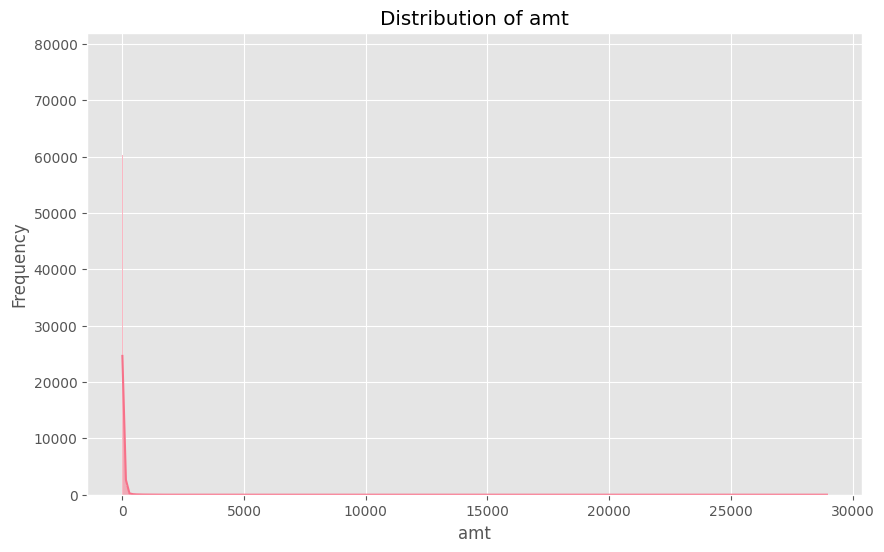

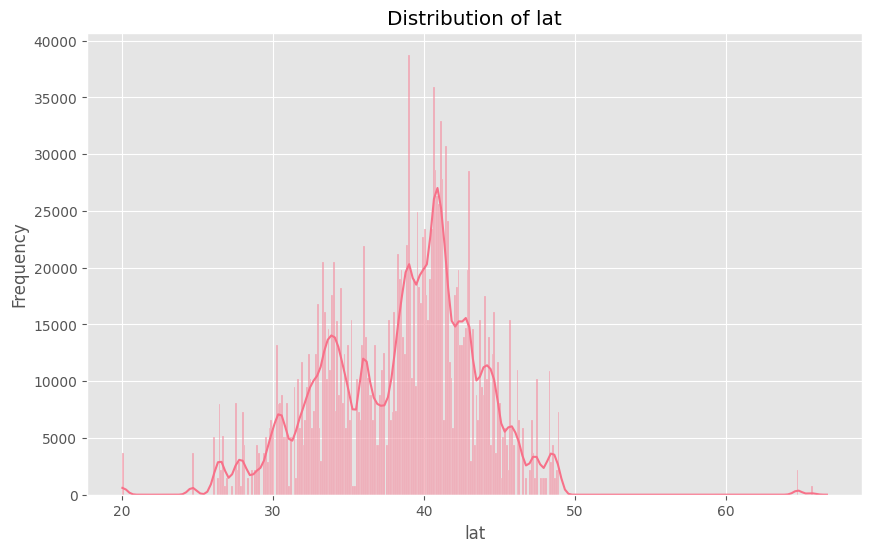

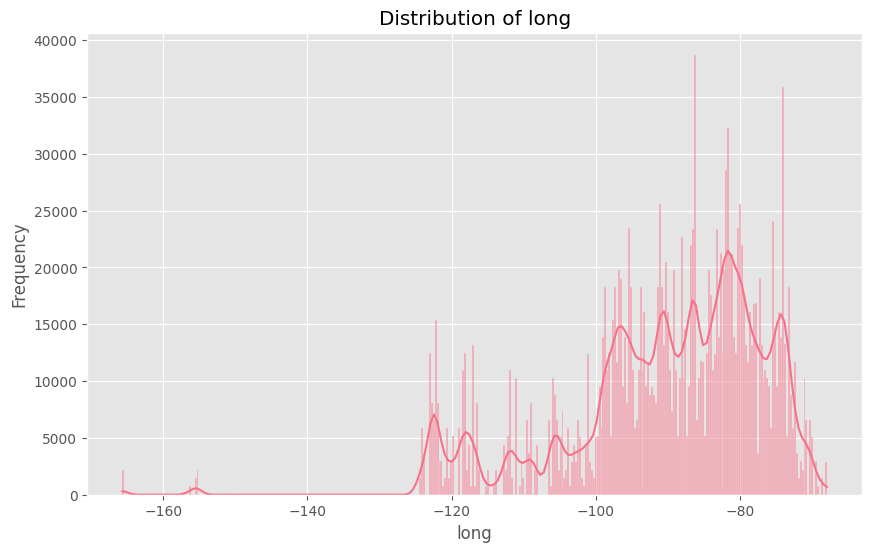

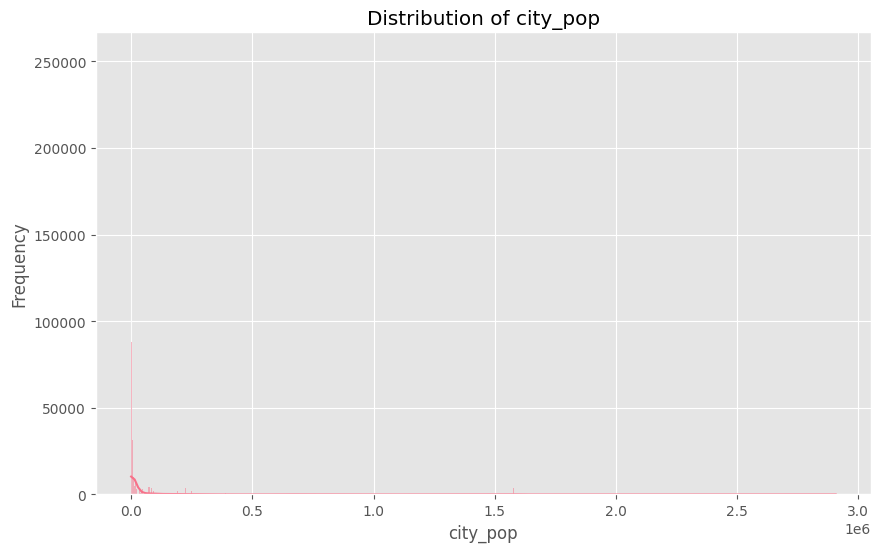

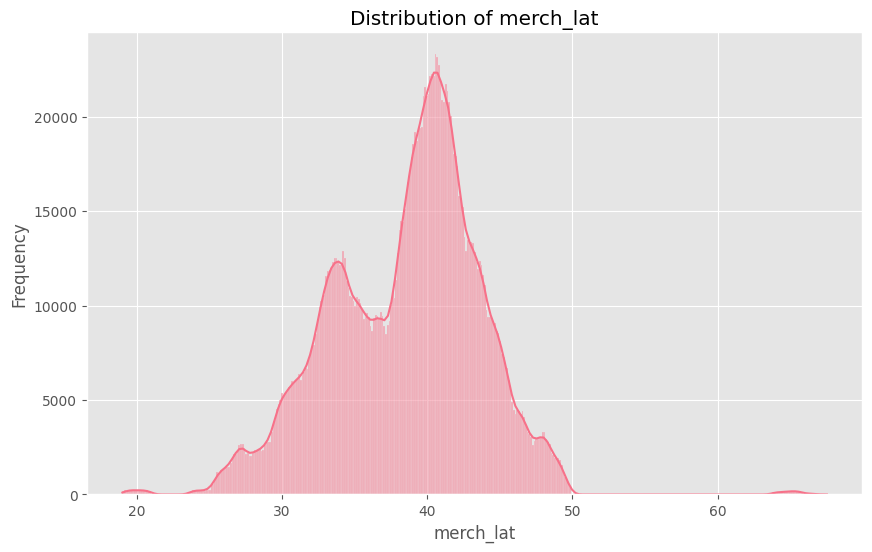

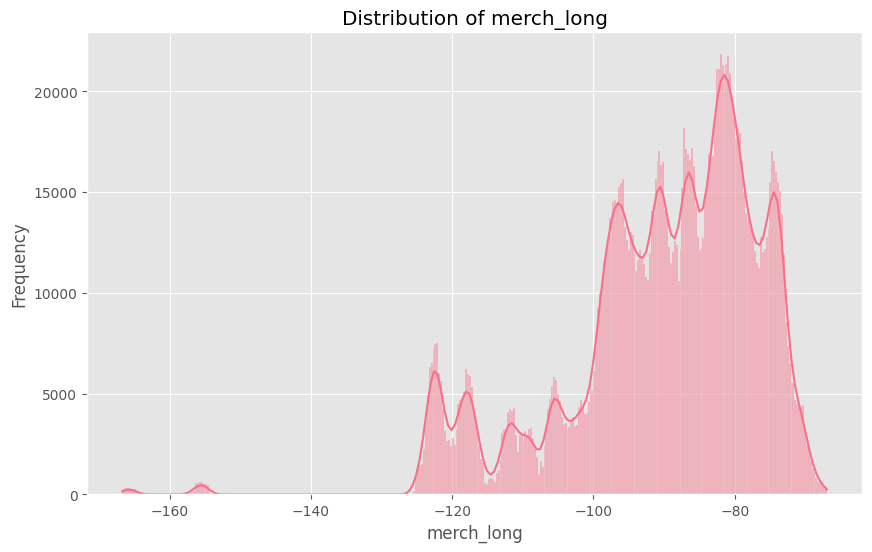

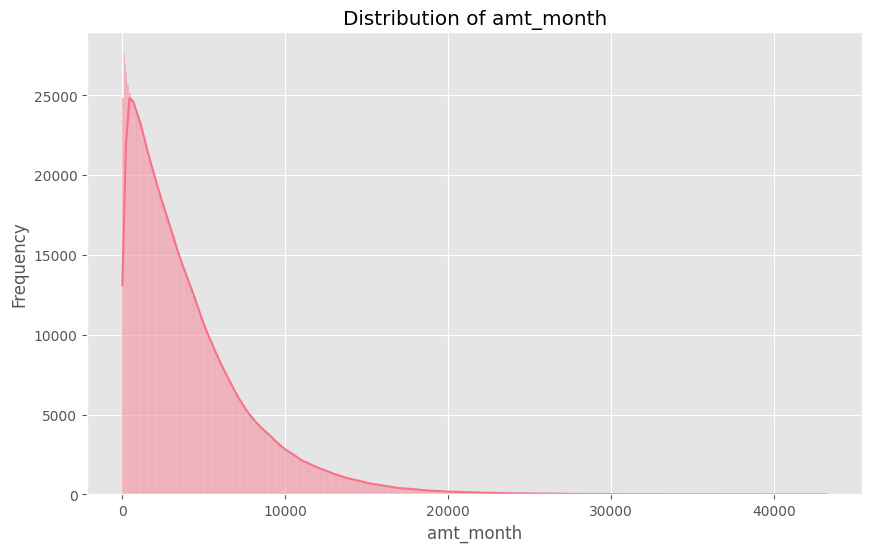

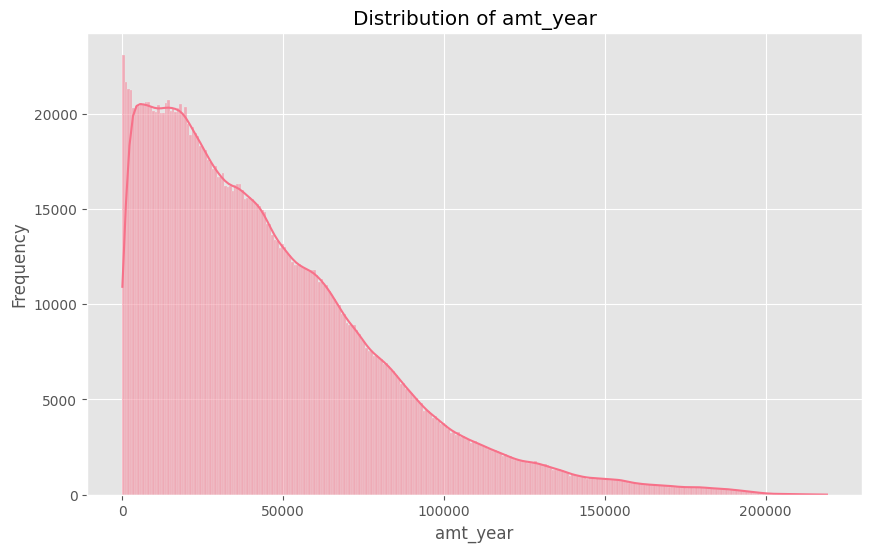

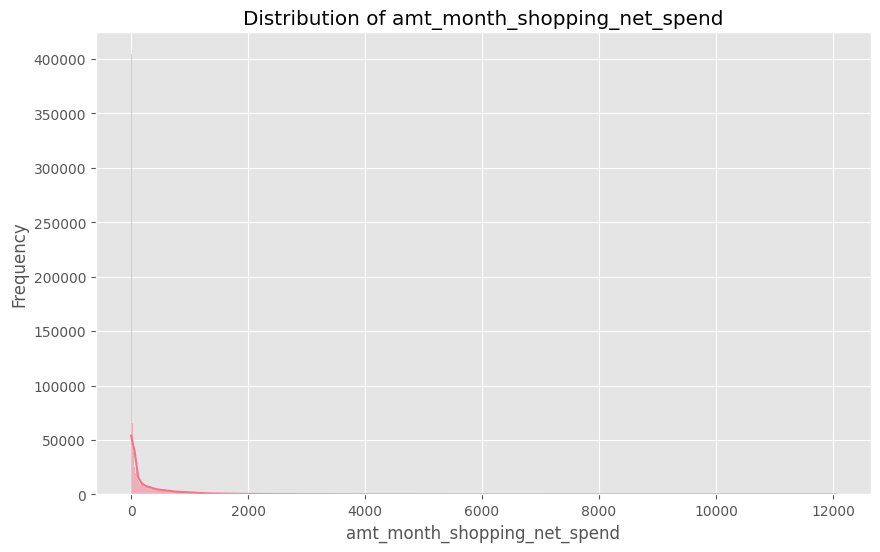

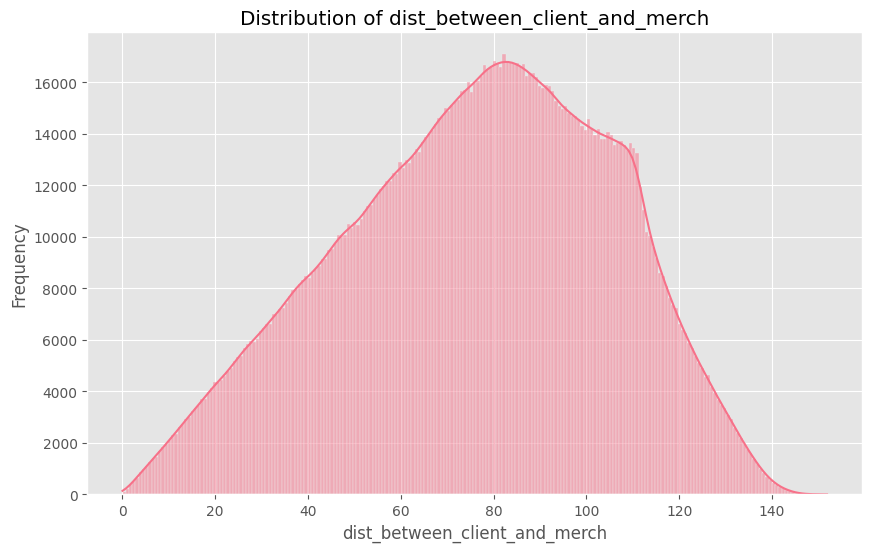

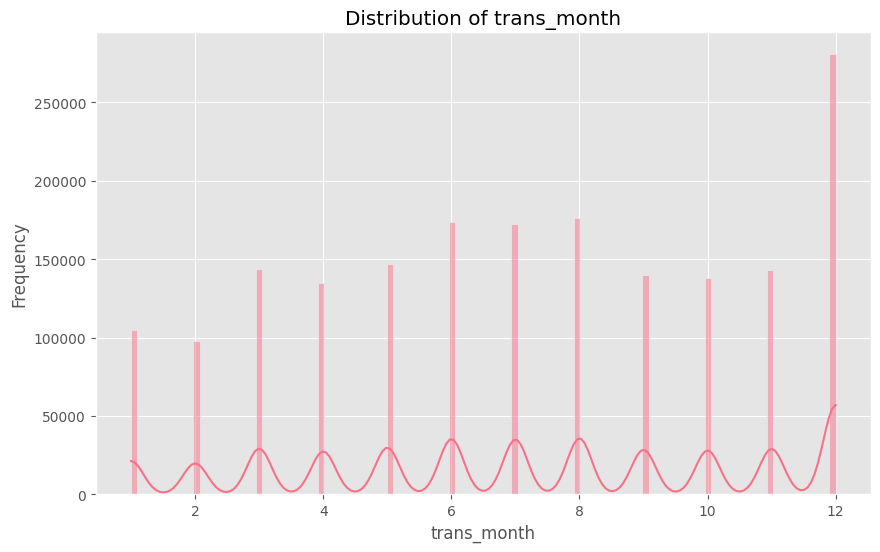

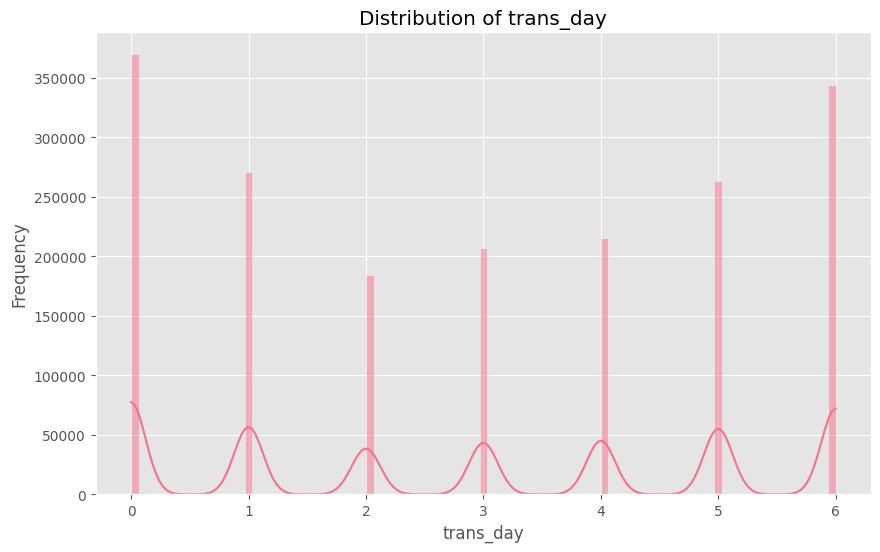

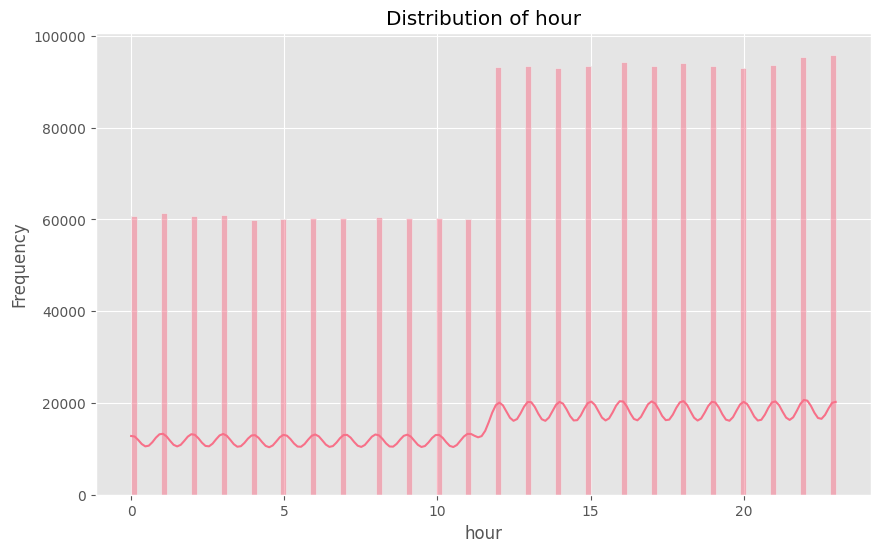

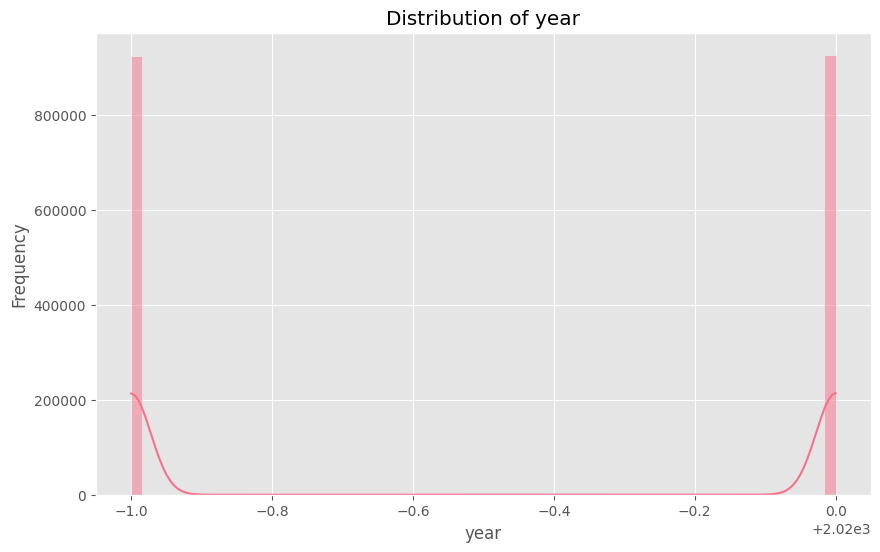

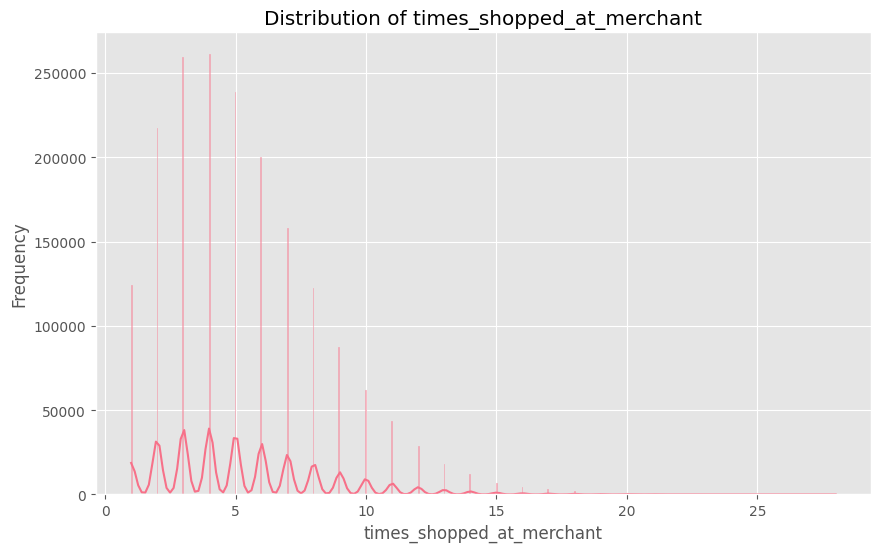

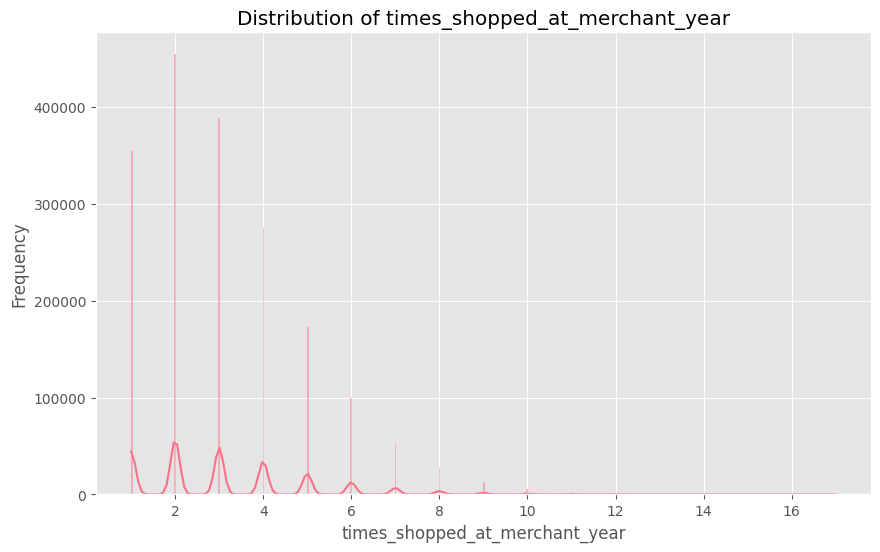

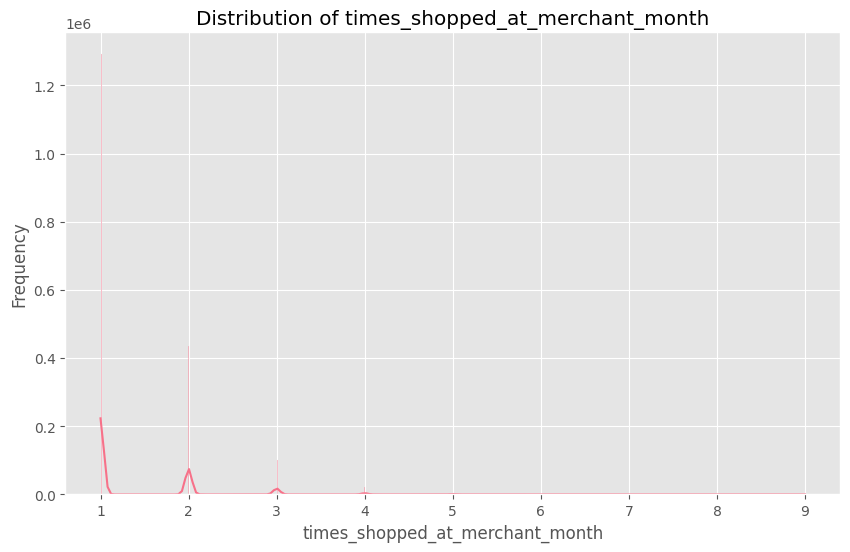

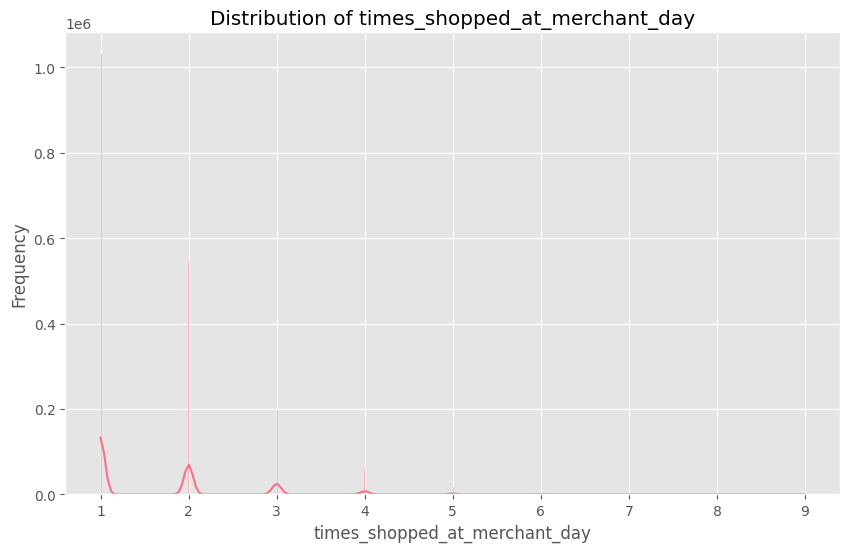

In [22]:
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Correlation

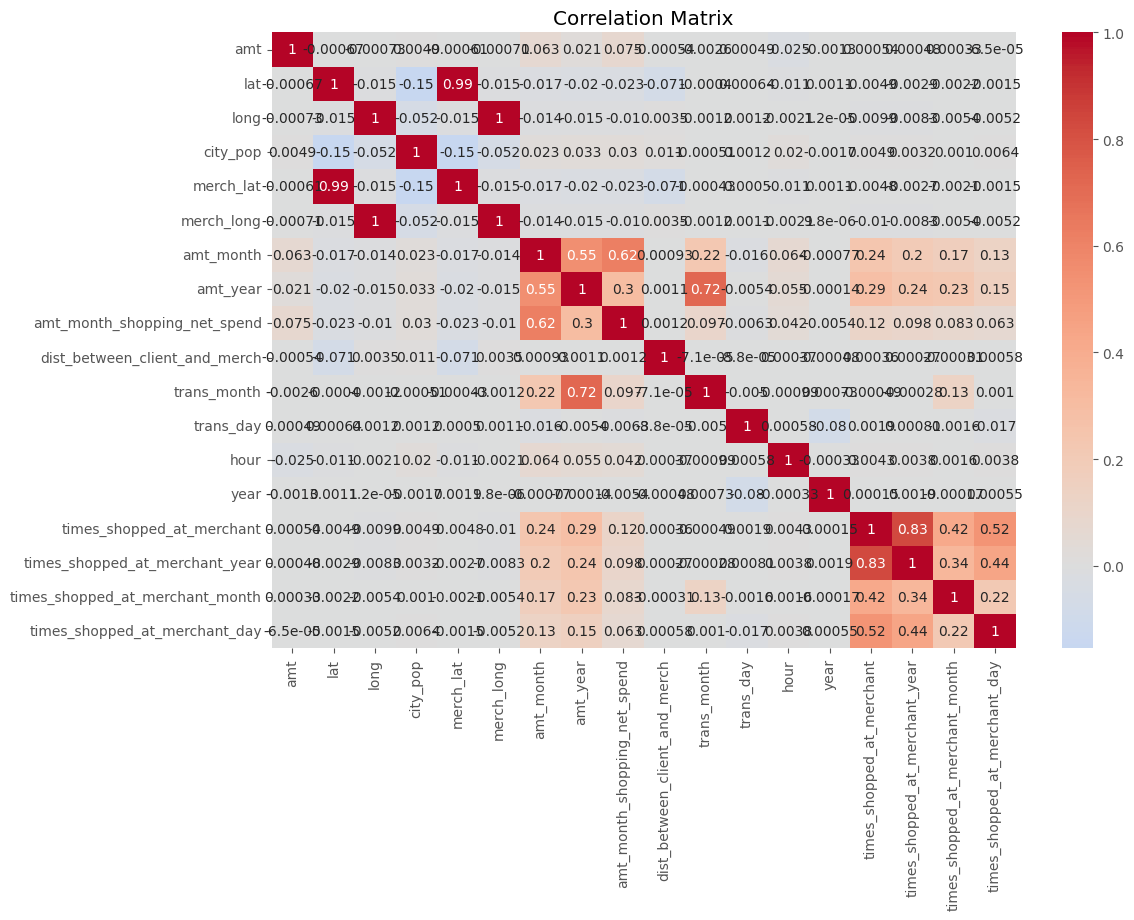

In [23]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

### Fraud Distribution Analysis

is_fraud
0    0.99479
1    0.00521
Name: proportion, dtype: float64


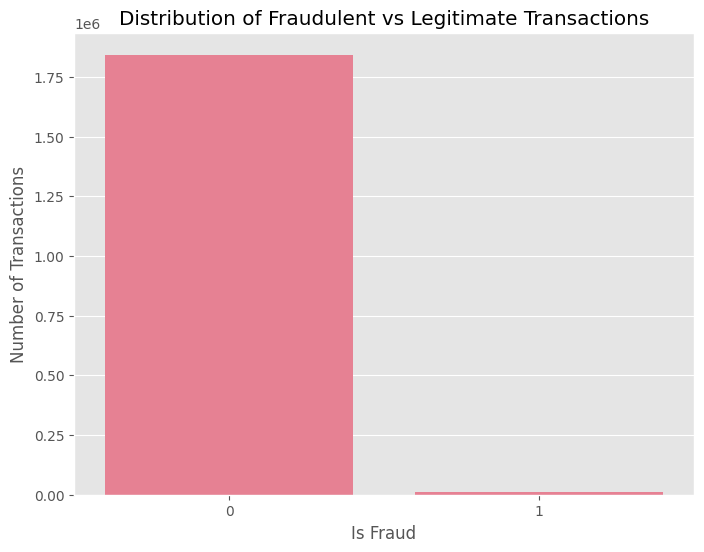

In [24]:
fraud_distribution = df['is_fraud'].value_counts(normalize=True)
print(fraud_distribution)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='is_fraud')
plt.title('Distribution of Fraudulent vs Legitimate Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Number of Transactions')
plt.show()